In [1]:
%load_ext autoreload
%autoreload 2
import pickle, json
from enterprise_extensions.models import model_2a
from enterprise.signals.parameter import sample as sample_params
import numpy as np
from impulse.impulse import sample, pt_sample
from impulse.pta_utils import initial_sample
import matplotlib.pyplot as plt
from emcee.autocorr import integrated_time

from PTMCMCSampler.PTMCMCSampler import PTSampler as ptmcmc

Do not have acor package


In [2]:
np.arange(4)[np.array([True, True, False, False])]

array([0, 1])

In [3]:
with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/psrs.pkl', 'rb') as f:
    psrs = pickle.load(f)

with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    params = json.load(f)

In [4]:
pta = model_2a([psrs[0]], noisedict=params, gamma_common=4.33, n_gwbfreqs=5, tm_marg=True, tnequad=True, tm_svd=True)

In [5]:
ntemps = 4
nchains = None
ndim, x0 = initial_sample(pta, ntemps, nchains)

In [12]:
res = pt_sample(pta.get_lnlikelihood, pta.get_lnprior, ndim, x0, ntemps=ntemps, tinf=True, num_samples=300_000)

  0%|          | 1/300 [00:01<05:37,  1.13s/it]/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))
100%|██████████| 300/300 [03:32<00:00,  1.41it/s]


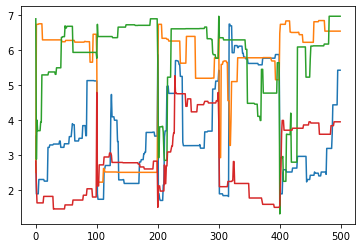

In [13]:
ii = 0
plt.plot(res[20_000:20500, ii, 0])
plt.plot(res[20_000:20500, ii, 1])
plt.plot(res[20_000:20500, ii, 2])
plt.plot(res[20_000:20500, ii, 3])
plt.show()

In [5]:
x0 = np.array(list(sample_params(pta.params).values()))

In [11]:
res = sample(pta.get_lnlikelihood, pta.get_lnprior, len(x0), x0, num_samples=1_000_000, buf_size=50_000)

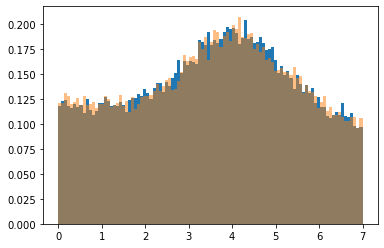

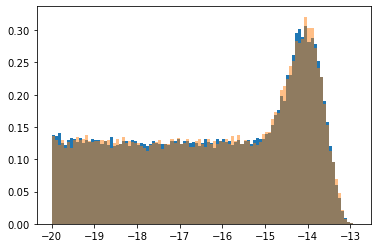

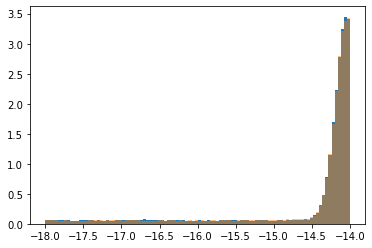

In [30]:
for ii in range(3):
    __, bins, __ = plt.hist(res[:, ii], bins=100, density=True)
    plt.hist(chain2[20_000:, ii], bins=bins, density=True, alpha=0.5)
    plt.show()

In [12]:
ndim = len(x0)
cov = np.diag(np.ones(ndim) * 0.01**2)

outDir = './chains/sngl/'

sampler = ptmcmc(ndim, pta.get_lnlikelihood, pta.get_lnprior, cov,
                 outDir=outDir, resume=False)

In [13]:
N = int(1e6)
x0 = np.hstack([p.sample() for p in pta.params])
sampler.sample(x0, N, SCAMweight=30, AMweight=15, DEweight=50, )

Finished 1.00 percent in 2.036206 s Acceptance rate = 0.365456Adding DE jump with weight 50
Finished 99.90 percent in 175.722410 s Acceptance rate = 0.209965
Run Complete


In [15]:
outDir = './chains/sngl/'
with open(outDir + 'chain_1.txt', 'r') as f:
    chain2 = np.loadtxt(f)

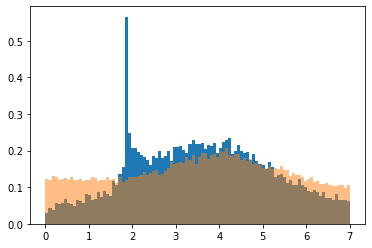

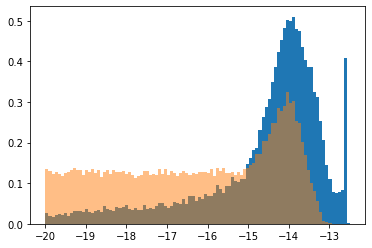

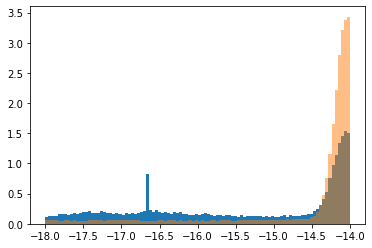

In [18]:
for ii in range(3):
    __, bins, __ = plt.hist(res[:, ii, 0], bins=100, density=True)
    plt.hist(chain2[20_000:, ii], bins=bins, density=True, alpha=0.5)
    # plt.hist(samples[:, ii], bins=bins, density=True, alpha=0.5)
    plt.show()

In [22]:
ii = 2
print(integrated_time(chain2[:, ii]))
print(integrated_time(res[:, ii, 0], quiet=True) / 10)
# print(integrated_time(samples[:, ii], quiet=True))

[23.82986538]
[528.53657667]


In [4]:
ntemps = 4
x0 = [np.array(list(sample_params(pta.params).values())) for _ in range(ntemps)]

In [19]:
res = pt_sample(pta.get_lnlikelihood, pta.get_lnprior, len(x0[0]), x0, ntemps=ntemps, num_samples=400_000)

  0%|          | 0/400 [00:00<?, ?it/s]/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))
100%|██████████| 400/400 [04:08<00:00,  1.61it/s]


In [20]:
print(res.shape)

(400000, 3, 4)


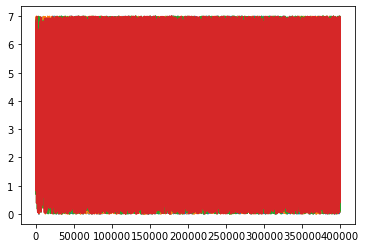

In [21]:
plt.plot(res[:, 0, 0])
plt.plot(res[:, 0, 1])
plt.plot(res[:, 0, 2])
plt.plot(res[:, 0, 3])

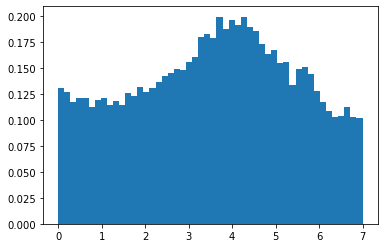

In [22]:
plt.hist(res[:, 0, 0], bins=50, density=True)
plt.show()

In [21]:
outDir = './chains/sngl/'
with open(outDir + 'chain_1.txt', 'r') as f:
    chain2 = np.loadtxt(f)

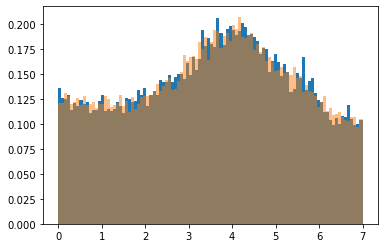

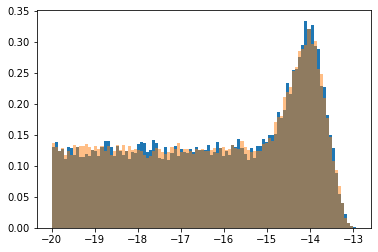

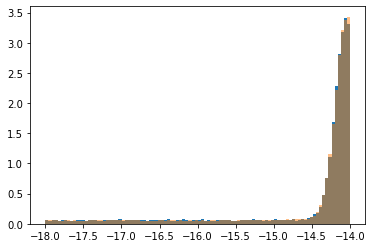

In [23]:
for ii in range(3):
    __, bins, __ = plt.hist(res[:, ii, 0], bins=100, density=True)
    plt.hist(chain2[20_000:, ii], bins=bins, density=True, alpha=0.5)
    # plt.hist(samples[:, ii], bins=bins, density=True, alpha=0.5)
    plt.show()

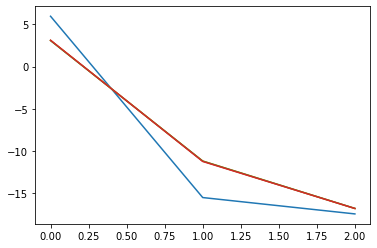

In [9]:
plt.plot(res[0][:, 2])
plt.plot(res[1][:, 2])
plt.plot(res[2][:, 2])
plt.plot(res[3][:, 2])

In [7]:
ndim = 136
tstep = 1 + np.sqrt(2 / ndim)

In [10]:
ntemps = 4

In [11]:
tmin = 1

In [23]:
ii = np.arange(ntemps)
ladder = tmin * tstep**ii

In [24]:
res = sample(pta.get_lnprior, lambda x: 0, len(x0), x0, num_samples=1_000_000)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))
100%|██████████| 1000/1000 [01:23<00:00, 12.04it/s]


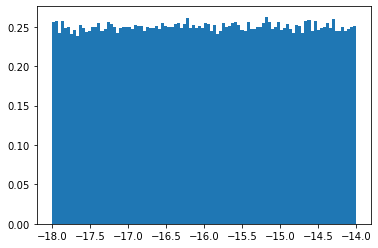

In [37]:
plt.hist(res[:, 2], bins=100, density=True)
plt.show()

In [58]:
mean = [3, 5]
cov = [[3, 4], [4, 20]]

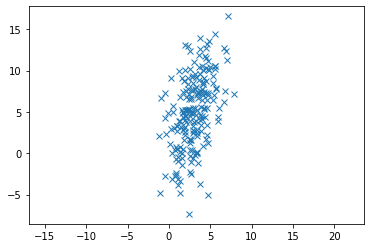

In [64]:
import matplotlib.pyplot as plt

x, y = np.random.multivariate_normal(mean, cov, 200).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [10]:
ladder = np.arange(1, 7)

In [11]:
1 / ladder

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667])

In [61]:
from scipy.stats import multivariate_normal

In [43]:
f = multivariate_normal(x, [1, 2], [2, 1])

In [41]:
x = np.linspace(0, 7, num=2000)

In [6]:
ntemps = 31
nchains = 4
x0 = [[np.array(list(sample_params(pta.params).values())) for _ in range(ntemps)] for _ in range(nchains)]

In [7]:
res = parallel_pt_sample(4, 4, ntemps, pta.get_lnlikelihood, pta.get_lnprior, len(x0[0][0]), x0, num_samples=300_000, inf_temp=True)

  8%|▊         | 23/300 [02:00<21:09,  4.58s/it]
(ray_pt_sample pid=28130) /Users/aaron/Documents/GitHub/impulse_mcmc/impulse/proposals.py:251: RuntimeWarning: invalid value encountered in double_scalars
(ray_pt_sample pid=28130)   q[groups[jumpind][ii]] += scale * sigma
(ray_pt_sample pid=28127) /Users/aaron/Documents/GitHub/impulse_mcmc/impulse/proposals.py:251: RuntimeWarning: invalid value encountered in double_scalars
(ray_pt_sample pid=28127)   q[groups[jumpind][ii]] += scale * sigma
(ray_pt_sample pid=28128) /Users/aaron/Documents/GitHub/impulse_mcmc/impulse/proposals.py:251: RuntimeWarning: invalid value encountered in double_scalars
(ray_pt_sample pid=28128)   q[groups[jumpind][ii]] += scale * sigma
  8%|▊         | 24/300 [02:04<20:48,  4.52s/it]
(ray_pt_sample pid=28129) /Users/aaron/Documents/GitHub/impulse_mcmc/impulse/proposals.py:251: RuntimeWarning: invalid value encountered in double_scalars
(ray_pt_sample pid=28129)   q[groups[jumpind][ii]] += scale * sigma
100%|█████

In [8]:
res

[array([[[  4.00511251,   6.51172063,   4.00511251,   5.009179  ],
         [-17.73330368, -11.64794878, -17.73330368, -16.17193606],
         [-15.57792294, -17.92143203, -15.57792294, -16.76595402]],
 
        [[  6.52020394,   4.00550655,   5.009179  ,   2.31721637],
         [-11.65192694, -17.7518517 , -16.17193606, -16.6210223 ],
         [-17.9282875 , -15.56345792, -16.79210703, -14.24319771]],
 
        [[  6.51540729,   4.01952282,   5.0178995 ,   2.28798291],
         [-11.65192694, -17.74487144, -16.18946333, -16.6210223 ],
         [-17.9282875 , -15.55900242, -16.80542894, -14.24319771]],
 
        ...,
 
        [[  5.90346392,   1.03918823,   6.19190994,   1.25016934],
         [-19.50806762, -17.08173094, -14.25300568, -12.6859441 ],
         [-14.15724348, -14.09565915, -15.11600225, -15.6779985 ]],
 
        [[  1.28148046,   0.75983489,   6.19190994,   1.25016934],
         [-16.20431115, -16.9685849 , -14.25300568, -12.6859441 ],
         [-14.1809837 , -14.0949473

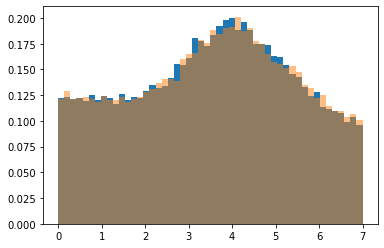

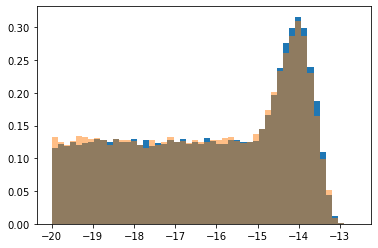

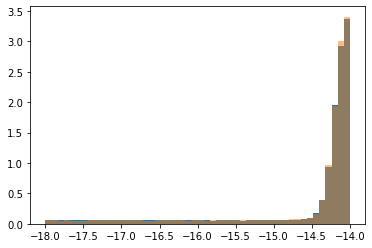

In [24]:
for ii in range(3):
    __, bins, __ = plt.hist(np.vstack(res)[50000:, ii, 0], bins=50, density=True)
    plt.hist(chain2[20_000:, ii], bins=bins, density=True, alpha=0.5)
    plt.show()

In [35]:
print(integrated_time(res[0][50000:, 2, 0]) / 10)
print(integrated_time(chain2[20_000:, 2]))

[21.68286]
[22.53624037]
